In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import cluster, neighbors, svm, metrics, preprocessing
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('Churn_Modelling.csv', delimiter=",")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

#removendo colunas desnecessárias (nº do cliente e outras indicadas na descrição do dataset)

In [4]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
balancePerSalary = df['Balance']/df['EstimatedSalary']
balancePerSalary

0       0.000000
1       0.744677
2       1.401375
3       0.000000
4       1.587055
          ...   
9995    0.000000
9996    0.564108
9997    0.000000
9998    0.808230
9999    3.407702
Length: 10000, dtype: float64

In [6]:
df['BalancePerSalary'] = balancePerSalary
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalancePerSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.000000
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.564108
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.000000
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.808230


In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalancePerSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,3.878703
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,108.337260
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.747002
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.514022
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,10614.655440


(array([7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2037.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

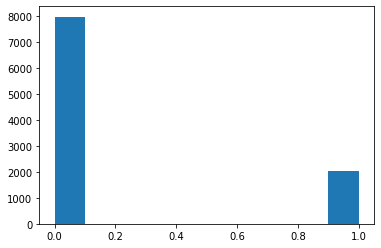

In [8]:
plt.hist(df["Exited"])

In [9]:
le = preprocessing.LabelEncoder() #transforma atributos qualitativos em quantitativos
for column in df.columns:
    if df[column].dtypes == 'object':
        df[column] = le.fit_transform(df[column])


scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=names) #df normalizado (todos os dados no intervalo [0,1])

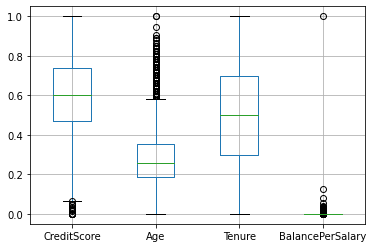

In [19]:
boxplot = df.boxplot(column=["CreditScore", "Age","Tenure", "BalancePerSalary"])

In [10]:
trainSample = df.sample(frac=0.8, random_state = 1) #seleção de 80% da base para treinamento
testSample = pd.concat([df, trainSample]).drop_duplicates(keep=False) #concatena a base original com a base de treinamento e exclui os duplicados, sobrando a amostra de teste

trainTarget = trainSample["Exited"] #define o atributo alvo da base para o treinamento
testTarget = testSample["Exited"] #define o atributo alvo da base para o teste


del testSample["Exited"]
del trainSample["Exited"]

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf = DecisionTreeClassifier()
clf.fit(trainSample.values, trainTarget.values)
resultCLF = clf.predict(testSample.values)

In [25]:
print("Acurácia: %0.2f" % (metrics.accuracy_score(testTarget, resultCLF)))
print("Precisão Média: %0.2f" % (metrics.average_precision_score(testTarget, resultCLF)))
print("Brier Score Loss: %0.2f" % (metrics.brier_score_loss(testTarget, resultCLF)))

matrizConfusao = metrics.confusion_matrix(testTarget, resultCLF)
print("Matriz de Confusão:\n",matrizConfusao)

Acurácia: 0.79
Precisão Média: 0.34
Brier Score Loss: 0.21
Matriz de Confusão:
 [[1384  218]
 [ 195  203]]


In [44]:
clf = DecisionTreeClassifier(min_samples_leaf=3)
clf.fit(trainSample.values, trainTarget.values)
resultCLF = clf.predict(testSample.values)
print("Acurácia: %0.2f" % (metrics.accuracy_score(testTarget, resultCLF)))
print("Precisão Média: %0.2f" % (metrics.average_precision_score(testTarget, resultCLF)))
print("Brier Score Loss: %0.2f" % (metrics.brier_score_loss(testTarget, resultCLF)))

matrizConfusao = metrics.confusion_matrix(testTarget, resultCLF)
print("Matriz de Confusão:\n",matrizConfusao)

Acurácia: 0.81
Precisão Média: 0.36
Brier Score Loss: 0.19
Matriz de Confusão:
 [[1412  190]
 [ 198  200]]


In [47]:
clf = DecisionTreeClassifier(max_features=5)
clf.fit(trainSample.values, trainTarget.values)
resultCLF = clf.predict(testSample.values)
print("Acurácia: %0.2f" % (metrics.accuracy_score(testTarget, resultCLF)))
print("Precisão Média: %0.2f" % (metrics.average_precision_score(testTarget, resultCLF)))
print("Brier Score Loss: %0.2f" % (metrics.brier_score_loss(testTarget, resultCLF)))

matrizConfusao = metrics.confusion_matrix(testTarget, resultCLF)
print("Matriz de Confusão:\n",matrizConfusao)

Acurácia: 0.80
Precisão Média: 0.37
Brier Score Loss: 0.20
Matriz de Confusão:
 [[1381  221]
 [ 175  223]]


In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
clf = GaussianNB()
clf.fit(trainSample.values, trainTarget.values)
resultCLF = clf.predict(testSample.values)

In [16]:
print("Acurácia: %0.2f" % (metrics.accuracy_score(testTarget, resultCLF)))
print("Precisão Média: %0.2f" % (metrics.average_precision_score(testTarget, resultCLF)))
print("Brier Score Loss: %0.2f" % (metrics.brier_score_loss(testTarget, resultCLF)))

matrizConfusao = metrics.confusion_matrix(testTarget, resultCLF)
print("Matriz de Confusão:\n",matrizConfusao)

Acurácia: 0.81
Precisão Média: 0.22
Brier Score Loss: 0.19
Matriz de Confusão:
 [[1593    9]
 [ 378   20]]


In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [69]:
clf = SVC(C=0.5, gamma='scale') # variar estes params
clf.fit(trainSample.values, trainTarget.values)
resultCLF = clf.predict(testSample.values)

In [70]:
print("Acurácia: %0.2f" % (metrics.accuracy_score(testTarget, resultCLF)))
print("Precisão Média: %0.2f" % (metrics.average_precision_score(testTarget, resultCLF)))
print("Brier Score Loss: %0.2f" % (metrics.brier_score_loss(testTarget, resultCLF)))

matrizConfusao = metrics.confusion_matrix(testTarget, resultCLF)
print("Matriz de Confusão:\n",matrizConfusao)

Acurácia: 0.84
Precisão Média: 0.34
Brier Score Loss: 0.16
Matriz de Confusão:
 [[1590   12]
 [ 314   84]]


In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

for train_index, test_index in skf.split(X,y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	clf1 = tree.DecisionTreeClassifier(random_state=1)
	clf1.fit(X_train, y_train)
	result1 = clf1.predict(X_test)

	clf2 = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=1)
	clf2.fit(X,y)
	result2 = clf2.predict(X_test)

	print(metrics.accuracy_score(y_test, result1), 
				metrics.accuracy_score(y_test, result2))

	print(confusion_matrix(y_test, result1))
	print(confusion_matrix(y_test, result2))